# Assignment 06

## Social Network Analysis

### Steve Elston

## CSCI E-108

## Introduction

In this assignment you will gain some experience with several algorithms used for the analysis of social networks. There are two running examples. The first dataset is a simple purely synthetic network. The second dataset is a widely used example of a small real-world social network.  

Anthropologist Wayne Zachary observed the social interactions between members of a small real-world [karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) over a two year period. Toward the end of the study period a conflict arose which caused the club to split into 2. Some club members stayed connect to a group centered on a founder, Mr Hi. Other members started a new club. Zachary published his results in [1977](https://www.jstor.org/stable/3629752).   

> **Required packages:** Before running the code in this notebook you will need to install the [NetworkX package](https://networkx.org/). The NetworkX has a dependency on [PyGraphViz](https://pygraphviz.github.io/). If you have not installed these packages un-comment the code below and install both. Especailly, if you are using the Windows OS, or have instalaiton problems on any OS, read these [PyGraphViz installation instructions](https://pygraphviz.github.io/documentation/stable/install.html) carefully. Finally, you will use the Louvain modularity algorithm from the Python [Community](https://python-louvain.readthedocs.io/en/latest/index.html) package.     

In [2]:
# Install NetworkX if it is not already present.
!pip install networkx

# You may need to install PyGraphViz. This instillation will fail on Windows.
# !pip install pygraphviz

# You may need to install the community package if it is not already present.
!apt remove python3-blinker
!pip install community

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  distro-info-data gir1.2-glib-2.0 gir1.2-packagekitglib-1.0 libappstream4 libgirepository-1.0-1
  libglib2.0-bin libpackagekit-glib2-18 libpolkit-agent-1-0 libpolkit-gobject-1-0 libstemmer0d
  libxmlb2 libyaml-0-2 lsb-release packagekit pkexec policykit-1 polkitd python-apt-common
  python3-apt python3-cffi-backend python3-cryptography python3-dbus python3-distro python3-gi
  python3-httplib2 python3-importlib-metadata python3-jeepney python3-jwt python3-keyring
  python3-lazr.uri python3-more-itertools python3-pkg-resources python3-pyparsing
  python3-secretstorage python3-six python3-wadllib python3-zipp
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  python3-blinker python3-launchpadlib python3-lazr.restfulclient python3-oauthlib
  python3-software-properties software-propertie

Execute the code in the cell below to import the packages you will need for this assignment.

In [3]:
import numpy as np
from scipy.sparse.linalg import eigs
import networkx as nx
import itertools
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity, greedy_modularity_communities
import community as community_louvain
import matplotlib.pyplot as plt

%matplotlib inline

## Data Samples

In this assignment you will work with two datasets. The first is a simple synthetic network. The second is the karate club dataset.

To create and plot the first dataset execute the code in the cell below. Notice the two clear communities.  

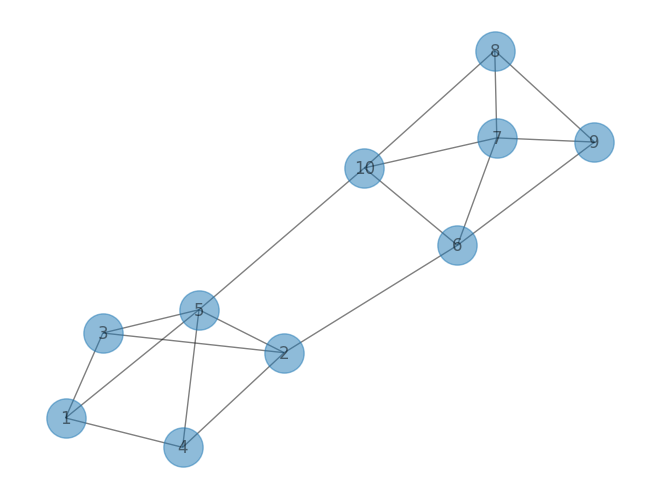

In [4]:
edge_list = [(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(2,6),(3,5),(4,5),(5,10),(6,7),(6,9),(6,10),(7,8),(7,9),(7,10),(8,9),(8,10)]
simple_graph = nx.Graph()
simple_graph.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
simple_graph.add_edges_from(edge_list)

nx.draw(simple_graph, with_labels=True, alpha=0.5, node_size=800)

To import and plot the karate club dataset execute the code in the cell below. The structure of this social network is fairly complex. However, you can see that some nodes clearly have some amount of centrality.

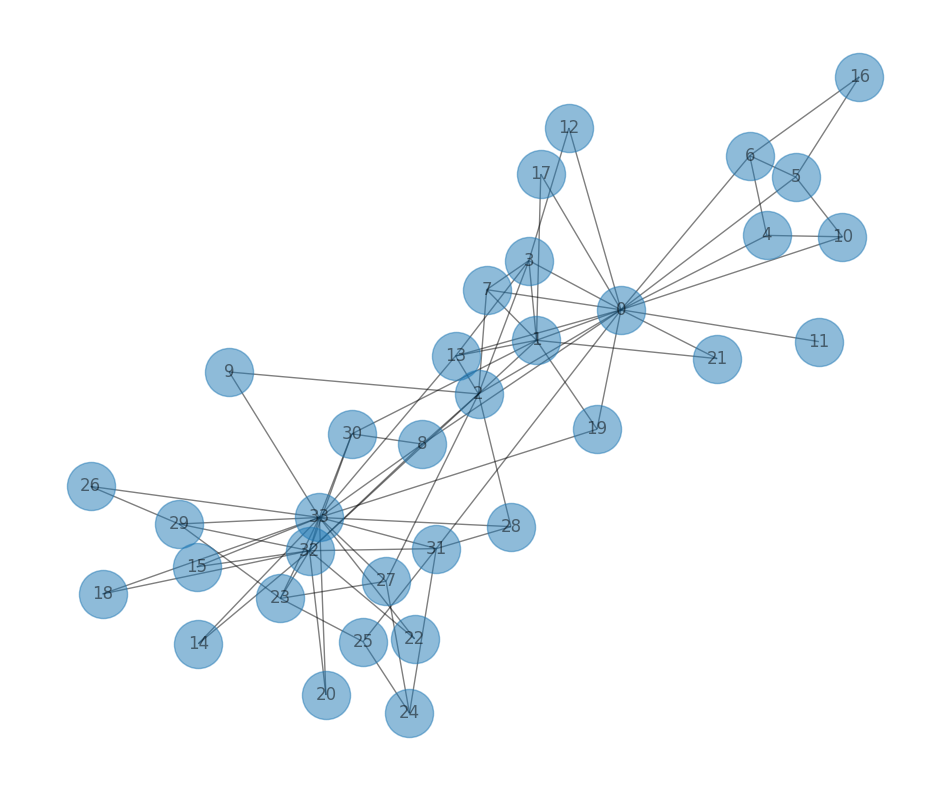

In [5]:
K_club = nx.karate_club_graph()

fig,ax = plt.subplots(figsize=(12,10))
nx.draw(K_club, with_labels=True, alpha=0.5, node_size=1200, ax=ax)

## Measures of Centrality

You will now compute and assess measures of centrality for both graphs. The goal is to find the nodes with the greatest influence measured by centrality.   

### Closeness Centrality

Closeness centrality is a simple centrality metric. Nodes with a small average inverse distance to the other nodes in the network are considered to have higher centrality.  

Execute the code in the cell below to compute and display the closeness centrality of the simple graph. This code uses the [networkx.algorithms.centrality.closeness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html?highlight=closeness%20centrality) function.   

In [6]:
simple_closeness_centrality = nx.closeness_centrality(simple_graph)
simple_closeness_centrality

{1: 0.45,
 2: 0.6,
 3: 0.5,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6,
 7: 0.5294117647058824,
 8: 0.47368421052631576,
 9: 0.45,
 10: 0.6428571428571429}

A graphical display of centrality metrics of a graph is often very useful in terms of interpreting the results. Execute the code in the cell below to display the closeness centrality of the simple graph.

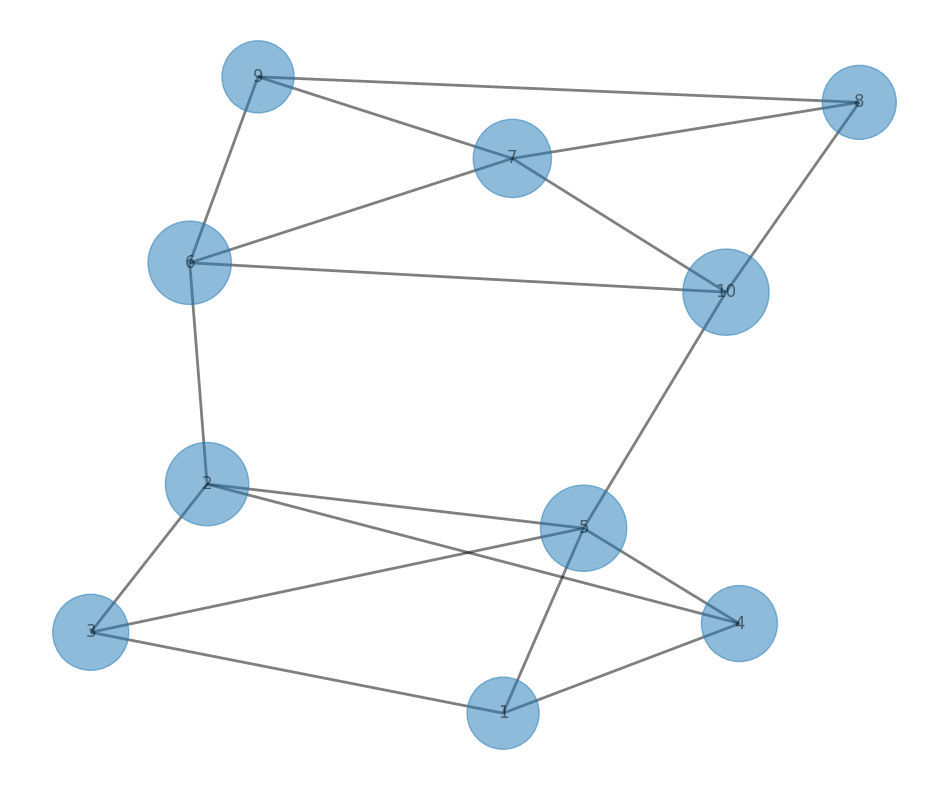

In [7]:
def plot_centrality(G, node_centrality=None, edge_centrality=None, size=1.0, width=2.0):
    fig,ax = plt.subplots(figsize=(12,10))
    ## Set the node sizes to display if provided
    if node_centrality==None:
        node_size=size
    else:
        node_size = [size*node_centrality[key] for key in node_centrality.keys()]
    ## Set the edge width to display if provided
    if edge_centrality==None:
        edge_width=width
    else:
        edge_width = [width*edge_centrality[u,v] for u,v in edge_centrality.keys()]
    ## Display the graph
    nx.draw(G, with_labels=True, alpha=0.5, node_size=node_size, width=edge_width, ax=ax)

plot_centrality(simple_graph, simple_closeness_centrality, size=6000, width=2)

There range of the closeness centrality values is limited. None the less, the results look reasonable since the nodes with the highest closeness centrality are concentrated around the middle of the graph, and more peripheral nodes have low closeness centrality.

> **Exercise 06-1:** You will now compute and display the closeness centrality of the karate club graph by the following steps:   
> 1. Compute the closeness centrality of the graph using the [networkx.algorithms.centrality.closeness_centrality](https://networkx.org/documentation/stable/search.html?q=closeness) function.  
> 2. Plot the closeness centrality of the graph using the `plot_centrality` function.  
> 3. Print the centrality of the graph nodes.

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


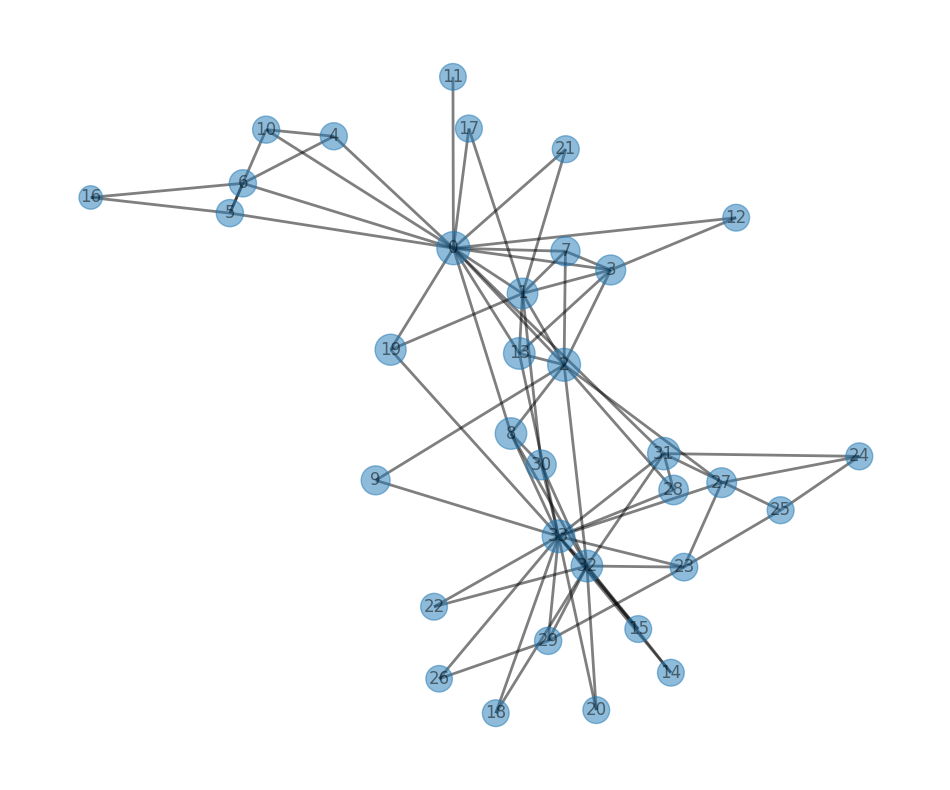

In [8]:
## Put your code below
karate_closeness = nx.closeness_centrality(K_club)
plot_centrality(K_club, karate_closeness, size=1000)
print(karate_closeness)



> Examine both the numerical values of closeness centrality and the plot. What statement can you make about how well the closeness centrality represents the connectedness of the network?     
> **End of exercise.**

> **Answer:**  The Closeness Centrality seems to represent the centrallity of each node well. The higher valued nodes are towards the middle of the graph and are more connected, versus the perriphy nodes having lower values.          

### K-Cores

K-cores are a metric of connection density at the densest part of a community, the core. A node, $n_i$, is in the k-core if at least $k$ edges can be removed without breaking the component containing the node into parts. At the minimum, a k-core node must have at least $degree(n_i) = k_i > k$.

The [networkx.k_componentse](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.connectivity.kcomponents.k_components.html) function iterates over values of k. The function starts from $k=1$ and terminates at the value of $k$ where all nodes are in disconnected components. To see how the core components evolved for the simple example graph execute the code in the cell below.   

In [9]:
nx.k_components(simple_graph)

{3: [{1, 2, 3, 4, 5}, {6, 7, 8, 9, 10}],
 2: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}],
 1: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]}

The key of the displayed dictionary is the value of k. The values are the components for that value of k. At $k=3$ there are 2 disconnected components. For $k > 3$ the components become disconnected.  

To visualize the cores at the different values of k execute the code in the cell below.  

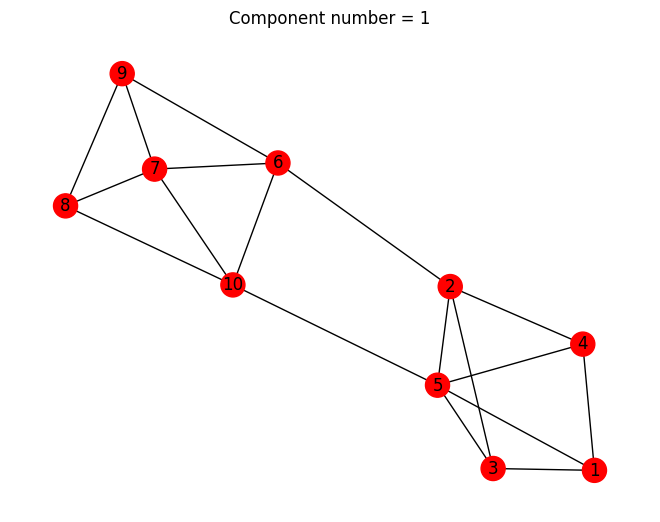

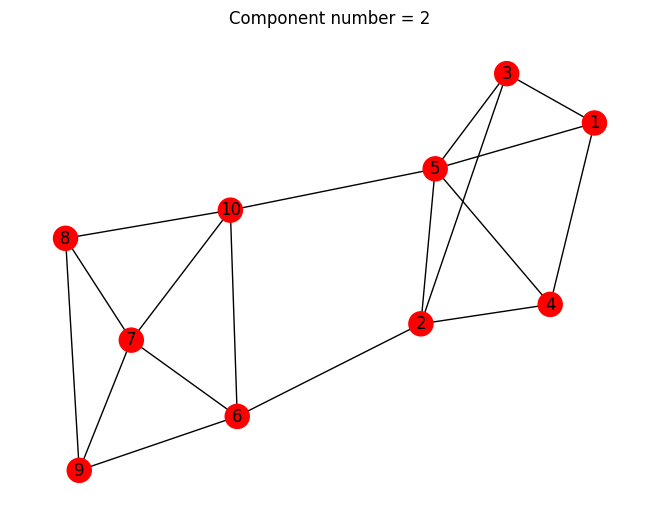

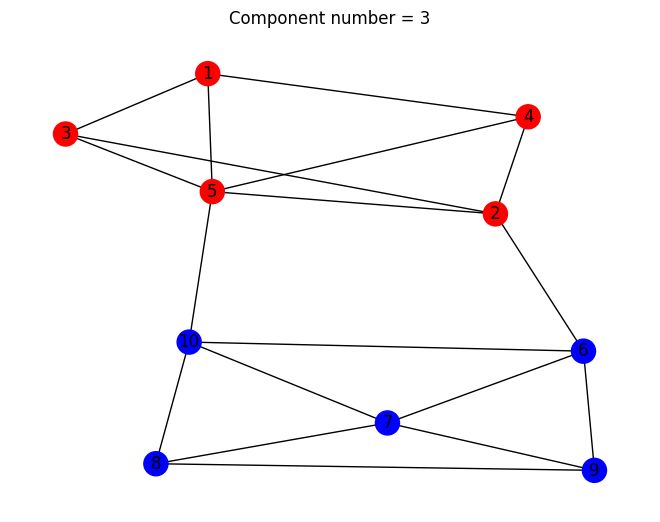

In [10]:
def plot_k_components(G, K_comps):
    for c in range(len(K_comps)): #[4,3,2,1]:
        node_colors = ['blue']*len(G.nodes)
        for node in K_comps[c+1][0]:
            node_colors[node-1] = 'red'
        nx.draw(G, node_color=node_colors, with_labels=True)
        plt.title('Component number = ' + str(c+1))
        plt.show()

K_comps = nx.k_components(simple_graph)
plot_k_components(simple_graph, K_comps)

Notice that for $k=3$ the simple graph is divided into two components. Given the structure of the communities, the selection of k-core nodes is a bit arbitrary. At termination, the algorithm must label nodes as core or not, and in this case, there is no particularly good division of the nodes.      

> **Exercise 06-2:** To visualize the k-cores of the karate club graph create and execute the code in the cell below to display these cores for different values of k. Hint: It will help your interpretation to print and examine the degree of the nodes in this graph, which is the [degree](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html?highlight=degree#networkx.Graph.degree) attribute of the graph object.

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]
{4: [{0, 33, 2, 3, 1, 32, 7, 8, 13, 30}], 3: [{0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33}, {0, 4, 5, 6, 10}], 2: [{0, 1, 2, 3, 7, 8, 9, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}, {0, 16, 4, 5, 6, 10}], 1: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]}


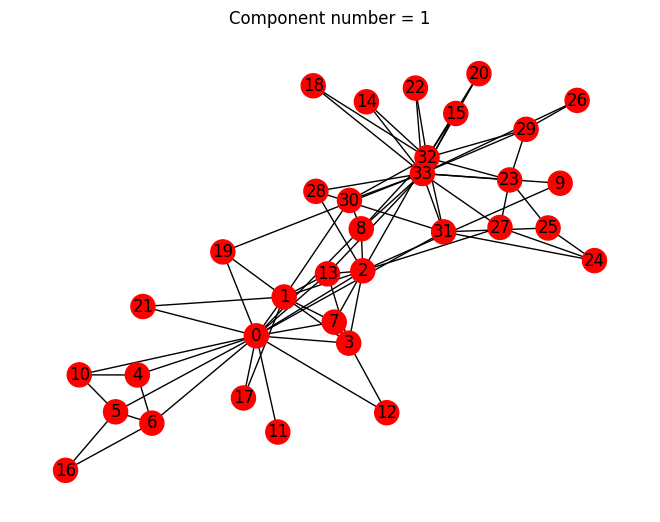

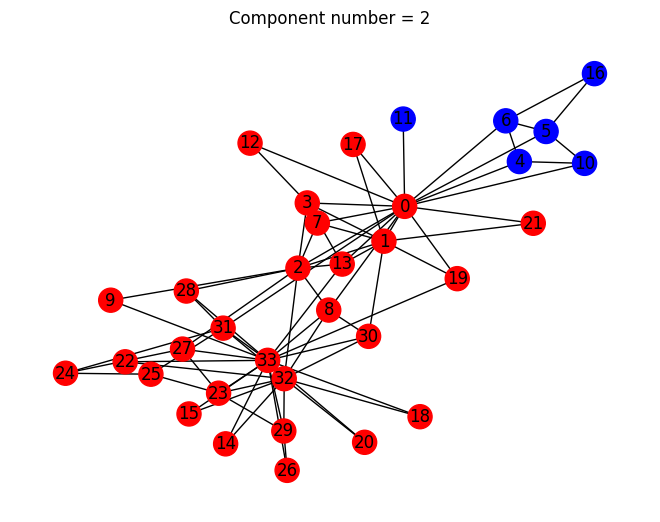

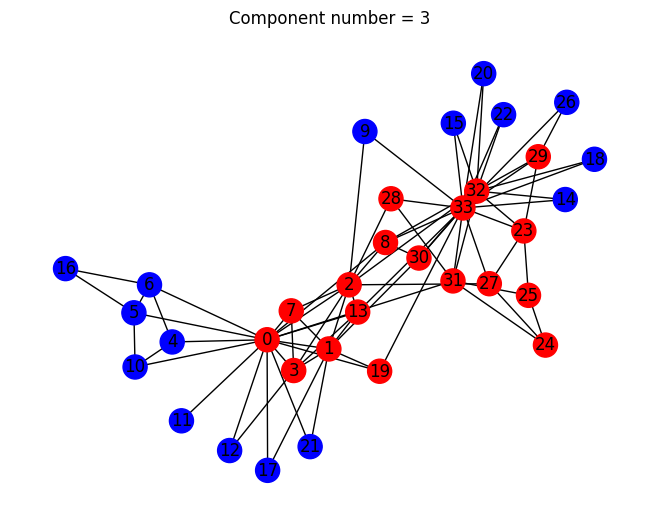

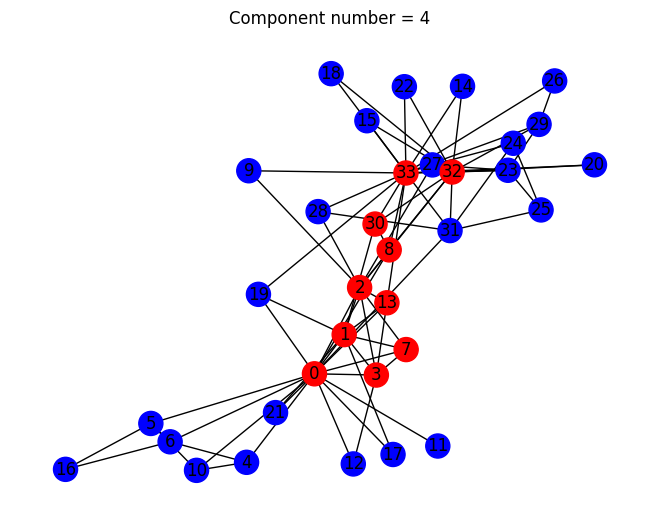

In [14]:
def plot_k_components_0_index(G, K_comps):
    for c in range(len(K_comps)): #[4,3,2,1]:
        node_colors = ['blue']*len(G.nodes)
        for node in K_comps[c+1][0]:
            node_colors[node] = 'red'
        nx.draw(G, node_color=node_colors, with_labels=True)
        plt.title('Component number = ' + str(c+1))
        plt.show()

## Put your code below
K_comps = nx.k_components(K_club)
print(K_club.degree())
print(K_comps)
plot_k_components_0_index(K_club, K_comps)



> Examine these plots and provide short answers to the following questions:      
> 1. How do the members of the core nodes change with increasing k as related to centrality?      
> 2. How does membership in the k-core align with connectivity of the graph?        
> **End of exercise.**

> **Answers:**     
> 1. It seems, as k increases, centrallity must be higher to be considered part of a group.     
> 2. It seems the most connected nodes are held in the k-core as k increases, dropping less connected nodes.    

### Triangle Centrality and Clustering  

The density of triangles, or triad relationships, in a social network is a measure of the centrality of the nodes. Triangle density is computed using the [networkx.algorithms.cluster.triangles](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.triangles.html?highlight=triangle#networkx.algorithms.cluster.triangles) function. To see the triangle density of the simple graph example execute the code in the cell below.        

{1: 2, 2: 2, 3: 2, 4: 2, 5: 4, 6: 2, 7: 4, 8: 2, 9: 2, 10: 2}

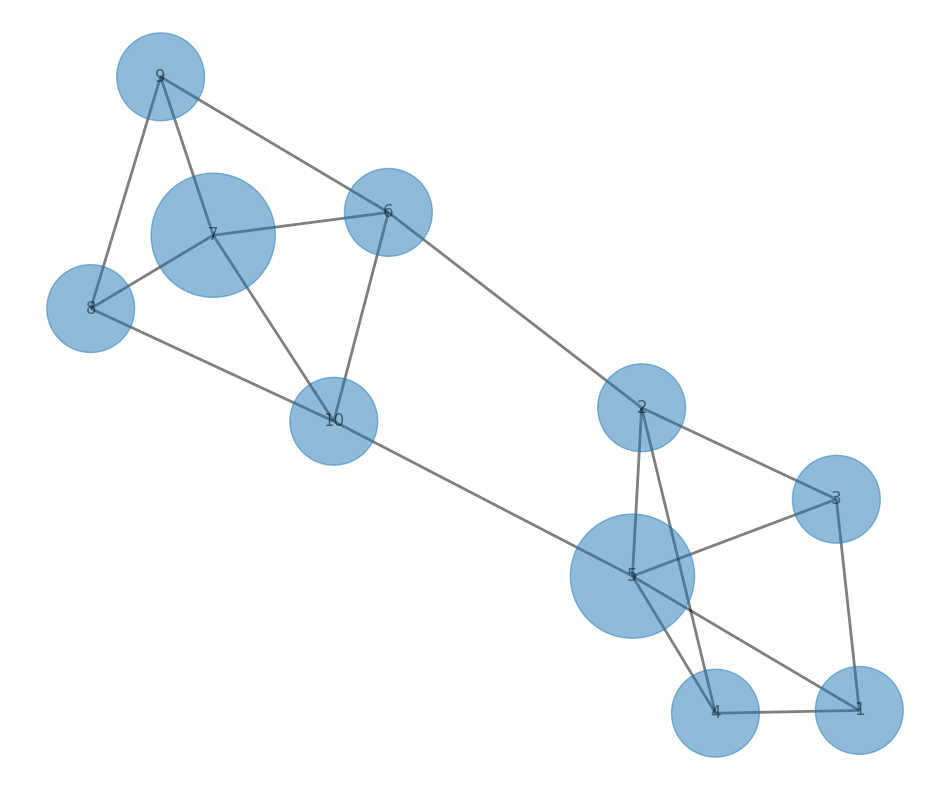

In [15]:
## Compute triangle density
triangles = nx.triangles(simple_graph)
plot_centrality(simple_graph, triangles, size=2000, width=2)
triangles

In the above plot you can see that two nodes have higher triangle density that the others. These nodes are vertices of 4 triangles, indicating centrality of these nodes.

Triangle centrality is a biased measure since nodes with higher degree are more likely to be vertices of a triad in a random graph. The clustering coefficient adjusts the triangle density of the nodes by the degree, which is done by the [networkx.algorithms.cluster.clustering](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html?highlight=clustering#networkx.algorithms.cluster.clustering) function. Execute the code to display the correlation coefficients for the simple graph.

{1: 0.6666666666666666,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.4,
 6: 0.3333333333333333,
 7: 0.6666666666666666,
 8: 0.6666666666666666,
 9: 0.6666666666666666,
 10: 0.3333333333333333}

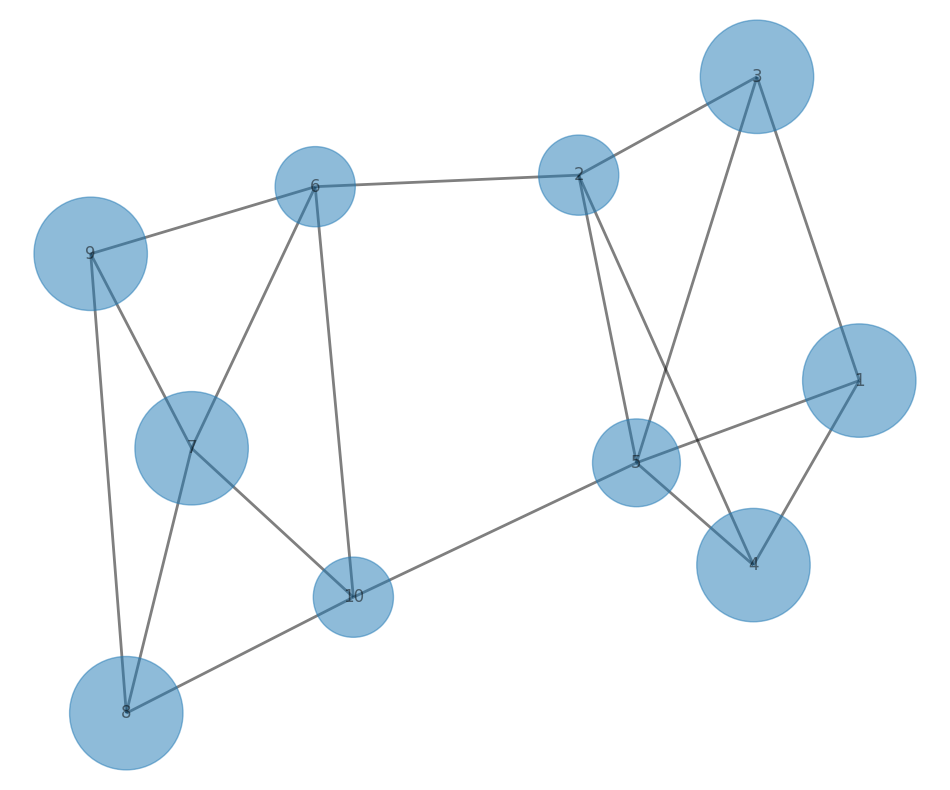

In [16]:
clustering = nx.clustering(simple_graph)
plot_centrality(simple_graph, clustering, size=10000, width=2)
clustering

There are several nodes with high clustering coefficients. Because of the small graph with significant symmetry several nodes have high clustering coefficients.    

> **Exercise 06-3:** Compute and display the triangle density for the karate club graph. Display the dictionary of triangle density and the plot.

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

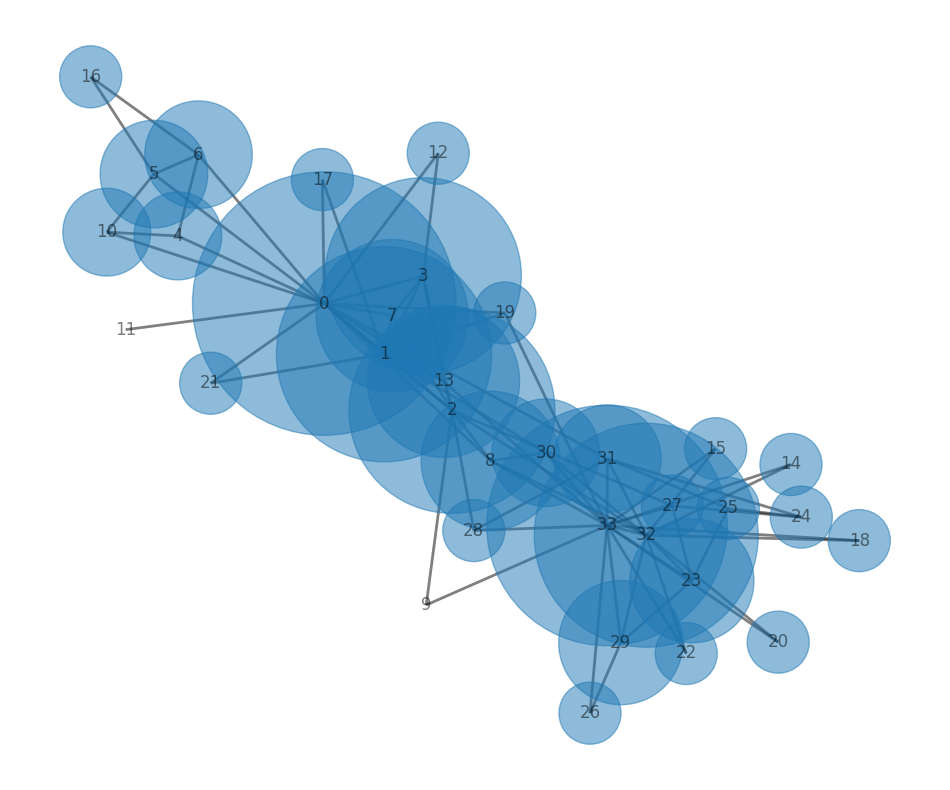

In [17]:
## Compute triangle density
triangles = nx.triangles(K_club)
plot_centrality(K_club, triangles, size=2000, width=2)
triangles



> Examine the triangle density of this graph. How do the nodes with high triangle density compare to the $k=$ core components found in Exercise 06-2?       
> **End of exercise.**     

> **Answer:** The same nodes that were the most central also have the highest triangle density.      

> **Exercise 06-4:** In the cell below create and execute the code to display the clustering coefficients of the karate club graph as a dictionary and a plot.   

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

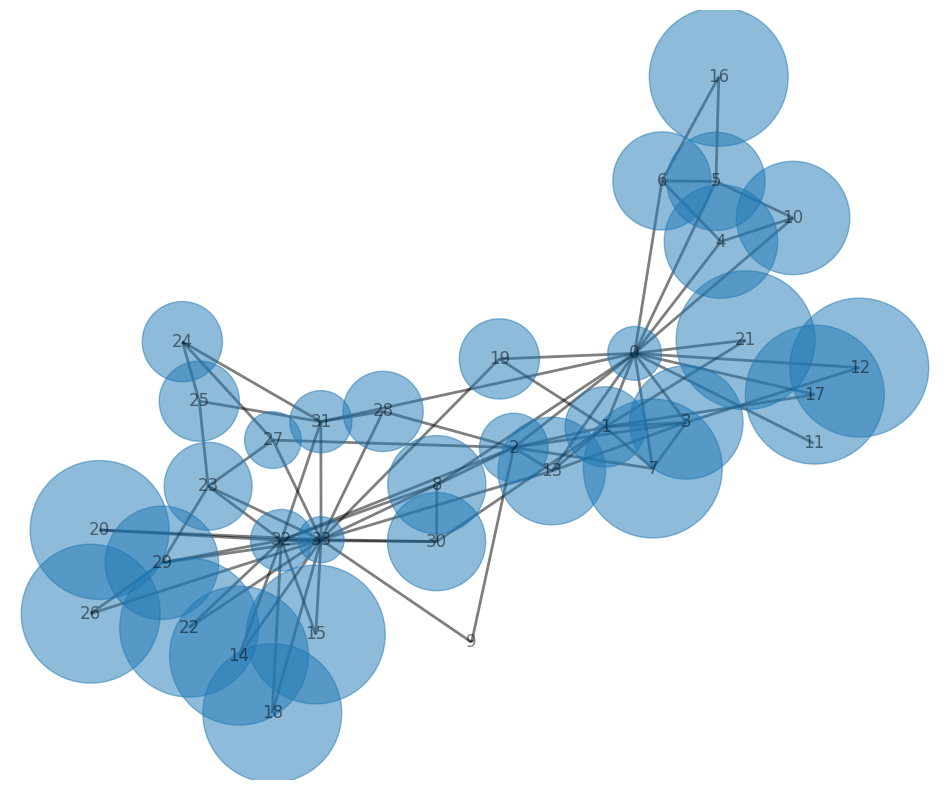

In [18]:
## Put your code below
clustering = nx.clustering(K_club)
plot_centrality(K_club, clustering, size=10000, width=2)
clustering



> Examine the results noticing how the clustering coefficient is down-weighted by the degree of the node. What pattern can you observe for the nodes with the highest and lowest clustering coefficients?    
> **End of exercise**

> **Answers:** It appears nodes lower clustering coefficients have higher triangle density.

## Betweenness

Betweenness is a measure of the number of shortest paths through a node or edge. Nodes and edges with high betweenness tend to be at the edges of communities within a graph. The node and edge betweenness often follow similar patterns, these different metrics can sometimes highlight different aspects of community structure.   

We use betweenness in two ways here. First to highlight community structure in the graph. The nodes and edges connecting communities tend to have the highest betweenness since there are relatively fewer paths between densely connected communities. Next, we will use the concept of betweenness to remove edges from graphs and partition them by communities.     

### Betweenness Centrality  

We can use the concept of either edge or node betweenness as a measure of centrality. Nodes and edges with high betweenness can define the edges of communities. The code in the cells below computes the edge betweenness with the [networkx.algorithms.centrality.edge_betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html?highlight=betweenness#networkx.algorithms.centrality.edge_betweenness_centrality) function and the node betweenness with the [networkx.algorithms.centrality.betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html?highlight=betweenness#networkx.algorithms.centrality.betweenness_centrality). Execute this code and examine the results.

In [19]:
edge_betweenness=nx.edge_betweenness_centrality(simple_graph)
edge_betweenness

{(1, 3): 0.0462962962962963,
 (1, 4): 0.0462962962962963,
 (1, 5): 0.1222222222222222,
 (2, 3): 0.10185185185185185,
 (2, 4): 0.10185185185185185,
 (2, 5): 0.07222222222222223,
 (2, 6): 0.25,
 (3, 5): 0.0851851851851852,
 (4, 5): 0.0851851851851852,
 (5, 10): 0.3055555555555556,
 (6, 7): 0.07962962962962962,
 (6, 9): 0.13518518518518519,
 (6, 10): 0.07962962962962962,
 (7, 8): 0.03518518518518519,
 (7, 9): 0.03888888888888889,
 (7, 10): 0.10555555555555558,
 (8, 9): 0.05185185185185186,
 (8, 10): 0.14629629629629629}

In [20]:
node_betweenness = nx.betweenness_centrality(simple_graph)
node_betweenness

{1: 0.009259259259259259,
 2: 0.20370370370370372,
 3: 0.020833333333333332,
 4: 0.020833333333333332,
 5: 0.29398148148148145,
 6: 0.21527777777777776,
 7: 0.03703703703703704,
 8: 0.02083333333333333,
 9: 0.0162037037037037,
 10: 0.27314814814814814}

Next, execute the code in the cell below to display a plot of the simple graph with node size showing betweenness centrality and edge width showing edge centrality.

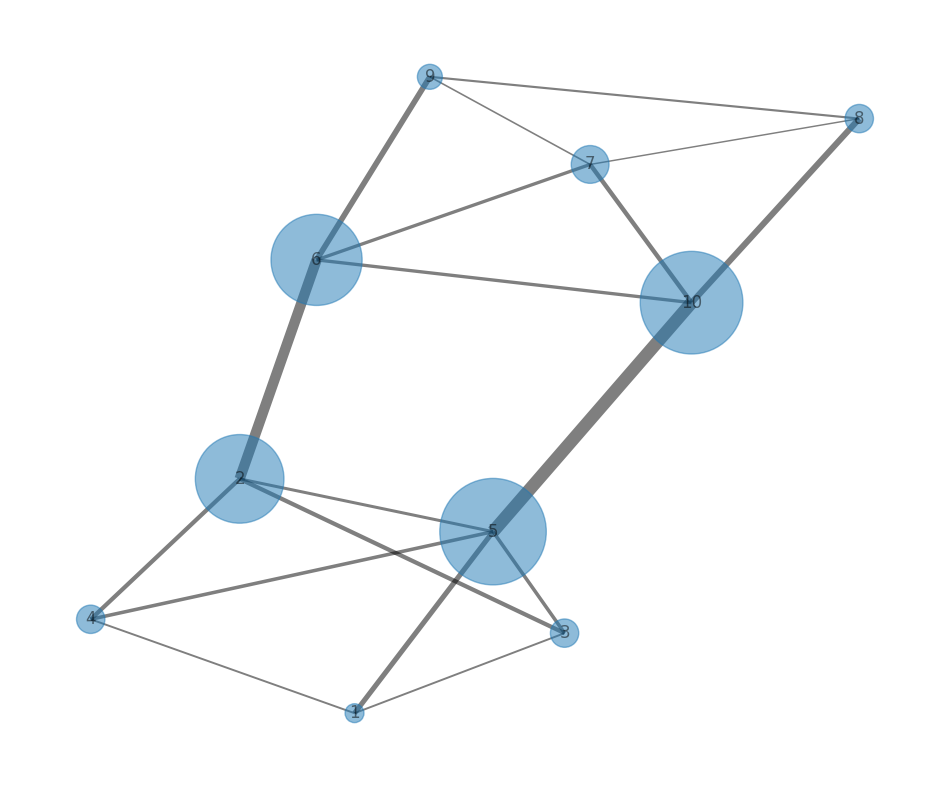

In [21]:
plot_centrality(simple_graph, node_betweenness, edge_betweenness, size=20000, width=30)

Notice the following aspects of the node and edge betweenness for this graph. The nodes with the highest betweenness are the ones with end points for edges between the communities. Correspondingly, the edges between the communities have the highest betweenness.  

> **Exercise 06-5:** Starting with the karate club graph create and execute code in the cell below do the following:   
> 1. Compute the edge betweenness.
> 2. Compute and print the node betweenness centrality.
> 3. Plot the graph showing edge betweenness and betweenness centrality.

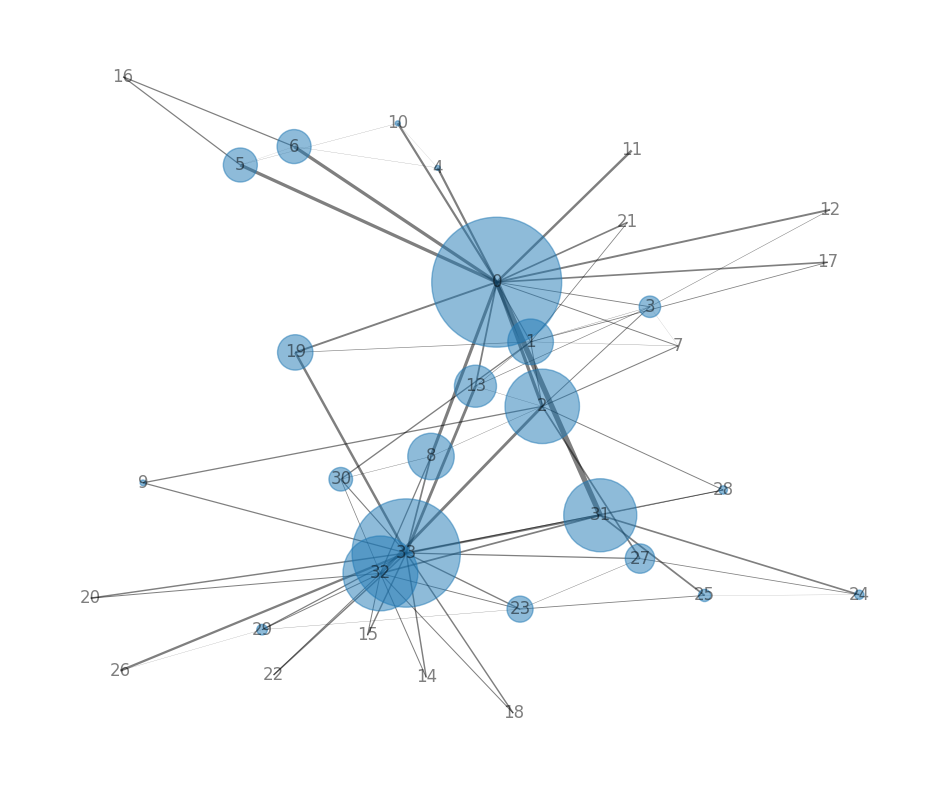

In [23]:
## Put your code below

edge_betweenness=nx.edge_betweenness_centrality(K_club)
node_betweenness = nx.betweenness_centrality(K_club)
node_betweenness
plot_centrality(K_club, node_betweenness, edge_betweenness, size=20000, width=30)



> Examine this plot and answer the following questions:
> 1. Compare the node betweenness centrality to the nodes in the $k=4$ k-core. Do nodes with high betweenness centrality appear to be largely the same ones in the k-core?   
> 2. Certain edges have relatively high betweenness. Can you see a correspondence between these edges and a possible division of the graph into communities?  
> **End of exercise.**

> **Answers:**    
> 1. Yes, the nodes with high betweenness centrality appear to be the same nodes in the k-core.    
> 2. The hight edge betweenness seems to reflect a bridge between clusters of nodes. The edge is not necessarily extending the two clusters, just connecting the two groups.    

### Graph Partitioning with Betweenness

Having explored the betweenness of the two running example graphs, we will now turn our attention to using betweenness to partition these graphs. Since the goal is to partition the graphs by removing edges, we will use edge betweenness.

The Girvan Newman algorithm is a well known method for partitioning graphs into communities using edge betweenness. The algorithm partitions the graph by recursively removing edges with the highest betweenness. Execute the code which uses [networkx.algorithms.community.centrality.girvan_newman](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html?highlight=girvan%20newman#networkx.algorithms.community.centrality.girvan_newman) the function, and examine the results.  

In [24]:
betweenness_decomp = girvan_newman(simple_graph)
betweenness_decomp = tuple(sorted(c) for c in next(betweenness_decomp))
betweenness_decomp

([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])

The Givan Newman algorithm has partitioned the graph into two subsets. These subsets correspond to the communities.    

Execute the code in the cell below to see the graph partitioned by these communities.

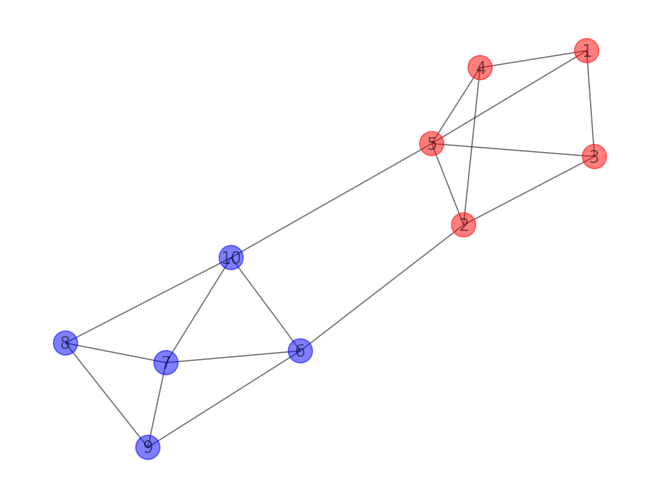

In [25]:
col = ['red','blue']
node_colors = ['None']*len(simple_graph.nodes)
for i,list in enumerate(betweenness_decomp):
    for val in betweenness_decomp[i]:
        node_colors[val-1] = col[i]

nx.draw(simple_graph, with_labels=True, alpha=0.5, node_color=node_colors)

The figure above shows the communities are labeled as as expected.   

We can take a direct approach to partitioning a graph using edge betweenness. The code in the cell below does just this using a greedy algorithm with the following steps:  
1. The function `remove_edges` prunes the k edges with the highest edge betweenness. In the for loop the betweenness of the current graph is computed. It is important to update the edge betweenness values each time an edge is removed, since the graph changes at each step.     
2. The edge to removed is determined by the `find_max_edge` function. This function searches the edges in the graph and returns the key (endpoint pair of nodes) with the maximum betweenness.  

Execute this code and examine the result.

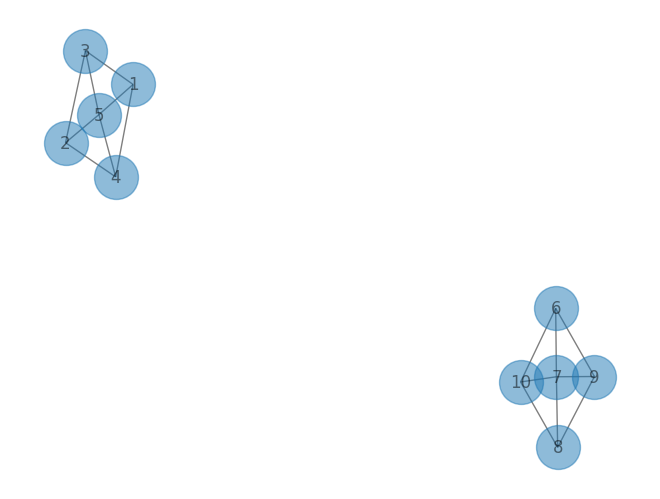

In [26]:
def find_max_edge(temp_betweenness):
    max_key = None
    max_betweenness = 0.0
    for edge in temp_betweenness.keys():
        if temp_betweenness[edge] > max_betweenness:
            max_betweenness = temp_betweenness[edge]
            max_key = edge
    ## Remove edge from dictionary
    temp_betweenness.pop(max_key)
    return max_key

def remove_edges(graph, k=2):
    '''Remove k edges from the graph'''
    temp_graph = graph.copy()
    for _ in range(k):
        ## Compute the betweenness for each graph created as edges are removed
        temp_betweenness = nx.edge_betweenness_centrality(temp_graph)
        max_key = find_max_edge(temp_betweenness)
        temp_graph.remove_edge(max_key[0],max_key[1])
    return temp_graph

partitioned_graph = remove_edges(simple_graph, k=2)

nx.draw(partitioned_graph, with_labels=True, alpha=0.5, node_size=1000)

The partition of the simple graph into the two communities is exactly as expected.

You will apply the betweenness-based graph partitioning to the karate club graph. But first, it will be useful to see the actual partitioning of the club members that resulted from the club splitting in a dispute. The club split into two communities, one centered around a key figure, Mr Hi, and the other around an officer of the club. To see this partition, execute the code in the cell below.

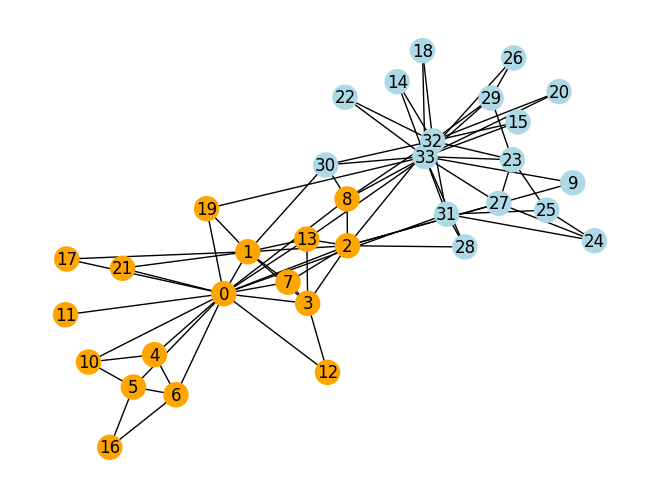

In [27]:
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K_club._node[n]['club']] for n in K_club._node]
nx.draw(K_club, node_color=node_colors, with_labels=True)

Examine this result, keeping in mind that Mr Hi is represented by node 0 and the officer by node 33.

> **Exercise 06-6:** To understand how the karate club graph can be partitioned using edge betweenness create and execute code in the cell below to do so. Use a for loop to remove between 9 and 15 edges from the graph. For each iteration of the for loop do the following:  
> 1. Compute a partitioned graph for each number of edges to remove using the `remove_edges` function.
> 2. Print the number of edges removed as a label of the resulting graph.
> 3. Display the plot of the partitioned graph, using the show method to ensure each plot is displayed individually.

9


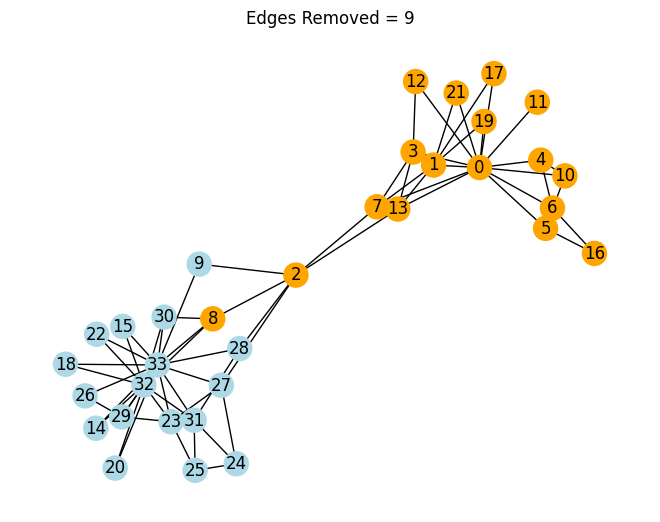

10


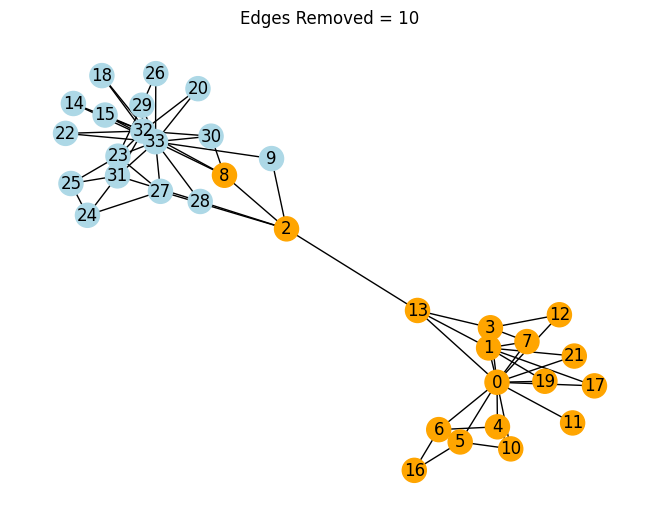

11


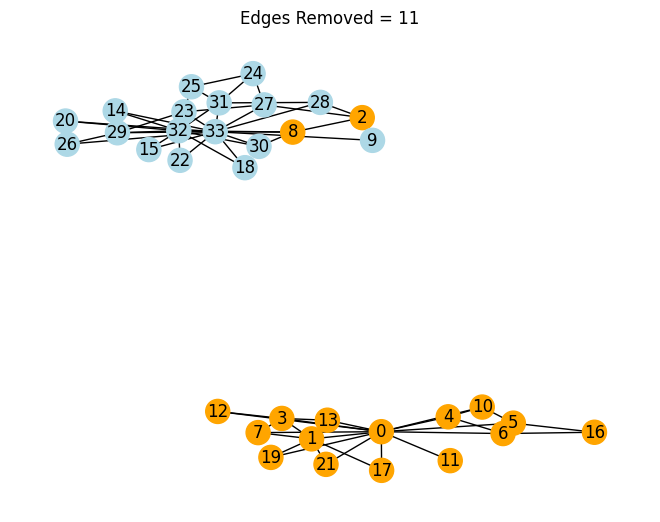

12


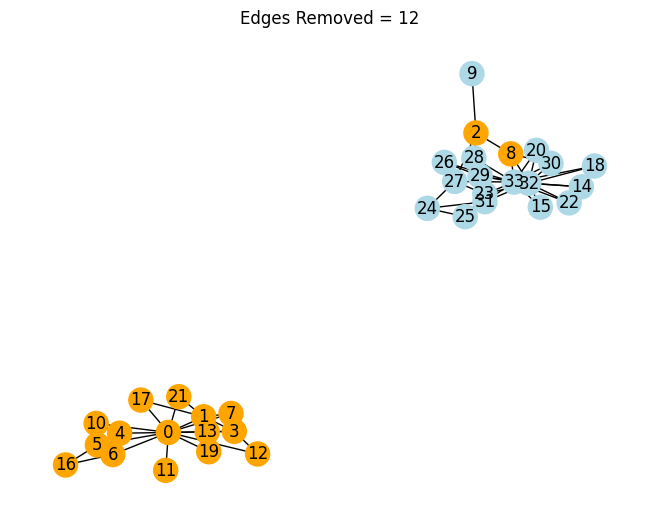

13


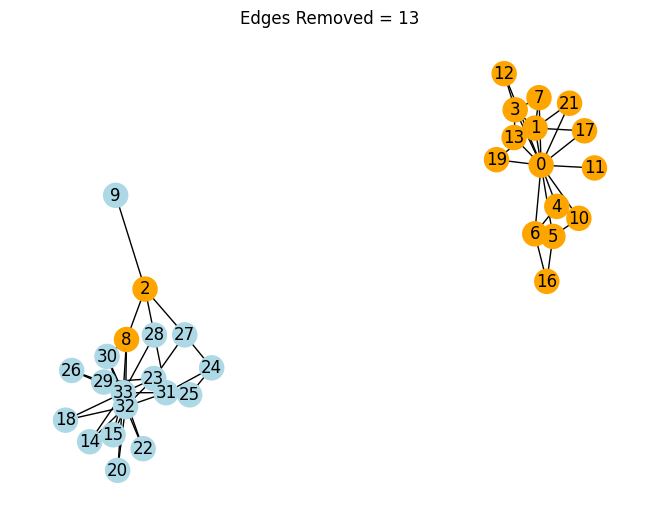

14


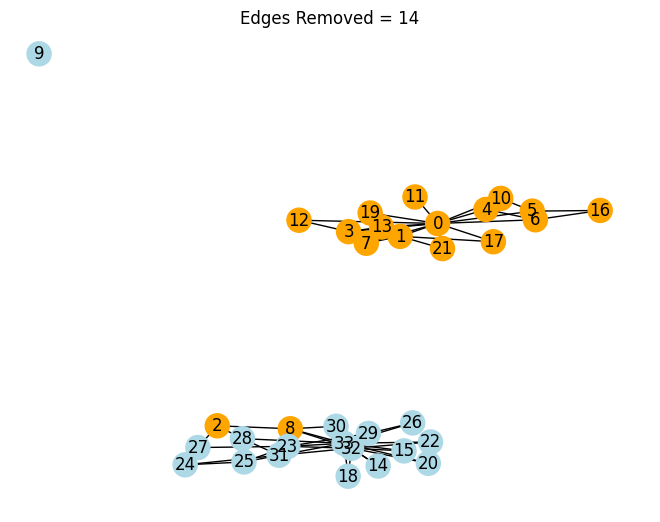

15


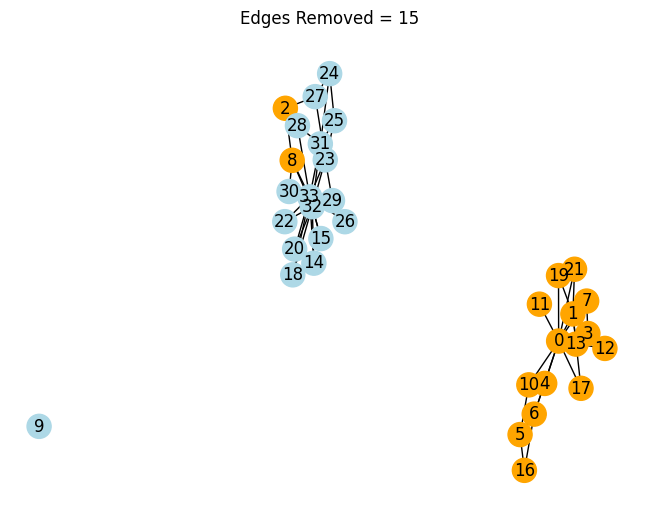

In [30]:
## Put your code below
for i in range(9,15+1):
    partitioned_graph = remove_edges(K_club, k=i)
    print(i)
    nx.draw(partitioned_graph, node_color=node_colors, with_labels=True)
    plt.title('Edges Removed = ' + str(i))
    plt.show()





> Examine these results and answer the following questions:  
> 1. How many edges must be removed to create a graph with two components, each representing a community?    
> 2. Are the members of these two communities found with the graph partitioned reasonably aligned with the actual split of the karate club?  
> 3. How many edges must be removed before the graph partition starts to produce isolated singletons?
> **End of exercise.**

> **Answers:**     
> 1. Eleven edges had to be removed to get two components, but still had a couple stray nodes in opposite groups.     
> 2. After removing the 11 edges, it appears we've found a reasonable partition of groups.             
> 3. The algorithm started producing singletons at fourteen edges removed.   

## Modularity and Graph Partitioning   

Modularity of a graph measures the concentration of edges to certain nodes compared the number expected for a random graph. Since we expect communities to have a high concentration of edges, modularity can be used as a community detection metric.      

There are many proposals for algorithms one can use to partition a graph. In these exercises will we look at only one, greedy partitioning algorithm. The algorithm is conceptually simple, starting with a random allocation of nodes to two equal partitions of the graph. Nodes chosen at random one at a time are moved from one component to the other. In this process, the community assignment of the chosen node is changed to the other community. If the modularity of the graph improves the new assignment is retained. Otherwise the node retains its current assignment.  

To see this algorithm applied to the simple example graph execute the code in the cell below, which uses the [networkx.algorithms.community.modularity_max.greedy_modularity_communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html?highlight=greedy%20modularity#networkx.algorithms.community.modularity_max.greedy_modularity_communities) function.

[frozenset({1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10})]


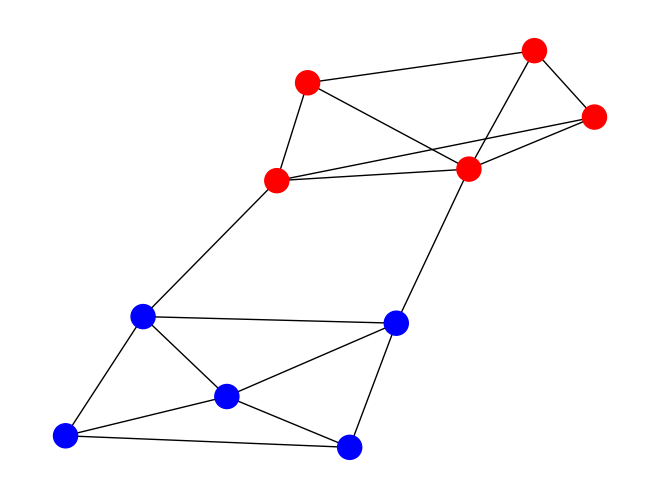

In [31]:
def assign_node_colors(G, communities, col, first_node_number=0):
    ## first unpack the list of frozen sets to a list of lists
    ## so we can actually work with the results
    node_lists = []
    for i in range(len(communities)):
        node_lists.append([x for x in set(communities[i])])

    ## Now, assign colors from the color dictionary
    node_colors = [' ']*len(G.nodes)
    for i in range(len(communities)):
        for j in node_lists[i]:
            node_colors[j-first_node_number] = col[i]
    return node_colors

## Find the modular communities
modular_communities = greedy_modularity_communities(simple_graph)
print(modular_communities)

## Get the color list for the nodes
node_colors = assign_node_colors(simple_graph, modular_communities, col, first_node_number=1)

## Finally draw the graph with the colors showing the communities
nx.draw(simple_graph, node_color=node_colors)

The greedy modularity algorithm has found the expected two communities.   

> **Exercise 06-7:** Complete the code in the cell below to apply the greedy modularity algorithm to the partition of the karate club graph. Assign the partitioned graph to a variable named `club_modular_communities`. Print the `club_modular_communities`. Execute the code and examine the results.

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
['blue', 'gray', 'gray', 'gray', 'blue', 'blue', 'blue', 'gray', 'red', 'gray', 'blue', 'blue', 'gray', 'gray', 'red', 'red', 'blue', 'gray', 'red', 'blue', 'red', 'gray', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']


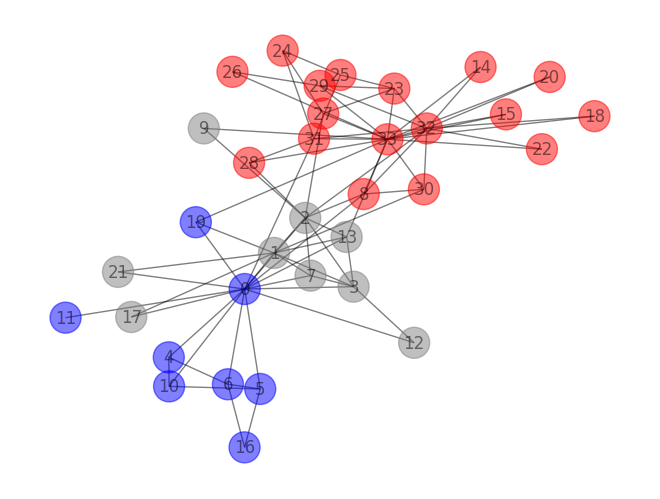

In [32]:
## Color dictionary for dispalying the graph
col = {0:'red',1:'gray',2:'blue'}

## Put your code below
club_modular_communities = greedy_modularity_communities(K_club)
print(club_modular_communities)


## Set the node colors
node_colors = assign_node_colors(K_club, club_modular_communities, col)
print(node_colors)

## Finally draw the graph with the colors showing the communities
nx.draw(K_club, with_labels=True, alpha=0.5, node_size=500, node_color=node_colors)

> Examine the graph noticing the partition of the graph. At first this partition seems odd. But, there might be an explanation. Do you see evidence that the third partition might be club members with no particularly stronger connection to either of the factions that split the club? To answer this question, look back at the k-core for $k=4$ and the betweenness centrality plots you created in exercises 06-3 and 06-6.     
> **End of exercise.**     

> **Answer:** There could be a case made for an impartial group since there was a smaller core group in the k-core for k=4. The lower group also had more high betweenness values than the upper, possibly showing less association of a subset of that group.      

#### Copyright 2021, 2022, 2023, Stephen F Elston. All rights reserved.